In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data_1=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\Code_Development_Phase_Files\output_100ms_pred_1.csv",skiprows =1,header=None)
data_2=pd.read_csv(r"C:\Users\sivateja_k\Documents\ieee\adversial_image\Code_Development_Phase_Files\output_100ms_pred_2.csv",skiprows =1,header=None)
data_1

,0,1,2,3,4,5,6,7
0,0.100224,603522251,NaN,instructions,66495326,33.18,NaN,NaN
1,0.100224,136815086,NaN,branches,62549738,31.21,NaN,NaN
2,0.100224,182790846,NaN,L1-dcache-loads,59999557,29.95,NaN,NaN
3,0.100224,101926378,NaN,L1-dcache-stores,58559070,29.23,NaN,NaN
4,0.200430,696494919,NaN,instructions,69976508,34.92,NaN,NaN
...,...,...,...,...,...,...,...,...
1919,48.109581,25819663,NaN,L1-dcache-stores,69842501,34.84,NaN,NaN
1920,48.196895,414319424,NaN,instructions,69856160,34.86,NaN,NaN
1921,48.196895,102301336,NaN,branches,69856358,34.86,NaN,NaN
1922,48.196895,103894162,NaN,L1-dcache-loads,69853730,34.86,NaN,NaN


In [3]:
def add_param_values(param_list,val):
    if param_list ==[]:
            param_list.append(val)
    else:
        param_list.append(param_list[-1]+row_1[i])
    return param_list

data_li=[data_1,data_2]
data_dict={}
j=0
for data in data_li:
    row_1=data.iloc[:,1]
    time=data.iloc[:,0]
    time_li=[]
    instructions_li=[]
    page_faults_li=[]
    llc_load_misses_li=[]
    dtlb_load_misses_li=[]
    for i in range(0,len(row_1),4):
        instructions_li=add_param_values(instructions_li,row_1[i])
    for i in range(1,len(row_1),4):
        page_faults_li=add_param_values(page_faults_li,row_1[i])
    for i in range(2,len(row_1),4):
        llc_load_misses_li=add_param_values(llc_load_misses_li,row_1[i])
    for i in range(3,len(row_1),4):
        dtlb_load_misses_li=add_param_values(dtlb_load_misses_li,row_1[i])
    for i in range(0,len(time),4):
        time_li.append(time[i])
    data_dict[j]={"instructions":instructions_li,"branches":page_faults_li,
                    "L1_dcache_loads":llc_load_misses_li,"L1_dcache_stores":dtlb_load_misses_li, "time":time_li}
    j+=1

In [4]:
def normalize_list(list1,list2):
    if len(list1)>len(list2):
        for j in range(len(list2),len(list1)):
            list2.append(list2[-1])
    elif len(list2)>len(list1):
        for j in range(len(list1),len(list2)):
            list1.append(list1[-1])
    return list1,list2
data_dict[0]["instructions"],data_dict[1]["instructions"]= normalize_list(data_dict[0]["instructions"],data_dict[1]["instructions"])
data_dict[0]["branches"],data_dict[1]["branches"]= normalize_list(data_dict[0]["branches"],data_dict[1]["branches"])
data_dict[0]["L1_dcache_loads"],data_dict[1]["L1_dcache_loads"]= normalize_list(data_dict[0]["L1_dcache_loads"],data_dict[1]["L1_dcache_loads"])
data_dict[0]["L1_dcache_stores"],data_dict[1]["L1_dcache_stores"]= normalize_list(data_dict[0]["L1_dcache_stores"],data_dict[1]["L1_dcache_stores"])
data_dict[0]["time"],data_dict[1]["time"]= normalize_list(data_dict[0]["time"],data_dict[1]["time"])

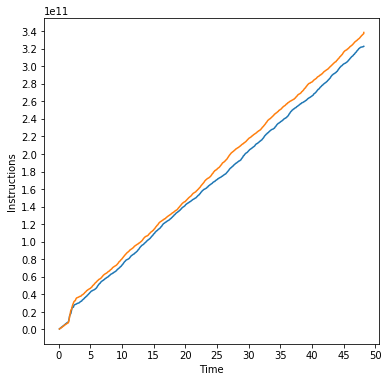

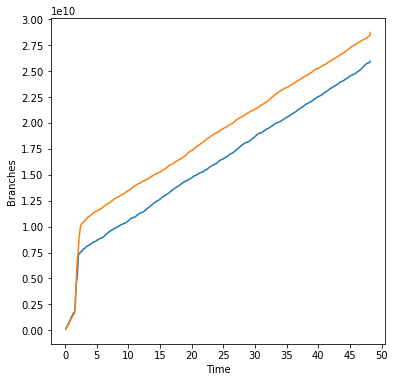

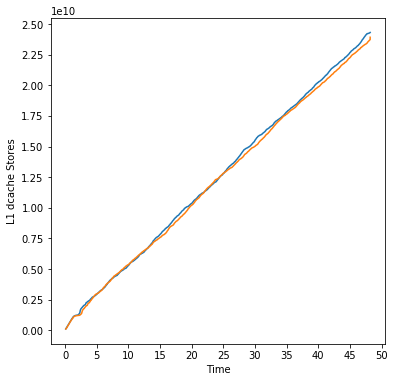

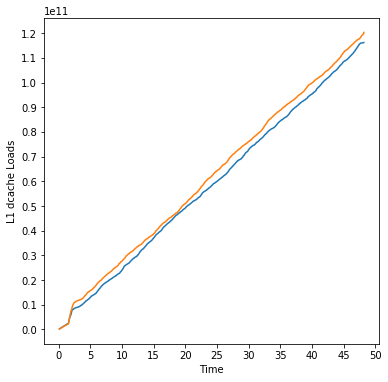

In [92]:
import matplotlib.ticker as plticker
params_dict_keys=["instructions","branches","L1_dcache_loads","L1_dcache_stores"]
params=["Instructions","Branches","L1 dcache Loads","L1 dcache Stores"]

df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[0]],"adversial": data_dict[1][params_dict_keys[0]],"time":data_dict[0]["time"]
}, )
#plt.ticklabel_format(useOffset=False,style='plain')
fig, ax = plt.subplots()
plt. rcParams["figure.figsize"] = (6,6)
ax.plot("time","clean",data=df)
ax.plot("time","adversial",data=df)
# y_formatter = plticker.ScalarFormatter(useMathText=True)
# y_formatter.set_scientific(True)
# y_formatter.set_powerlimits((8,9))
# ax.yaxis.set_major_formatter(y_formatter)
plt.xlabel("Time")
plt.ylabel(params[0])
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
locy = plticker.MultipleLocator(base=2e10)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(locy)
#ax.ticklabel_format(scilimits=(1,9))
plt.show()

for k in range(1,4,2):
    df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[k]],"adversial": data_dict[1][params_dict_keys[k]],"time":data_dict[0]["time"]
    }, )
    #plt.ticklabel_format(useOffset=False,style='plain')
    fig, ax = plt.subplots()
    plt. rcParams["figure.figsize"] = (6,6)
    ax.plot("time","clean",data=df)
    ax.plot("time","adversial",data=df)
    plt.xlabel("Time")
    plt.ylabel(params[k])
    loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
    locy = plticker.MultipleLocator(base=.25e10)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(locy)
    plt.show()
df = pd.DataFrame({"clean": data_dict[0][params_dict_keys[2]],"adversial": data_dict[1][params_dict_keys[2]],"time":data_dict[0]["time"]
}, )
#plt.ticklabel_format(useOffset=False,style='plain')
fig, ax = plt.subplots()
plt. rcParams["figure.figsize"] = (6,6)
ax.plot("time","clean",data=df)
ax.plot("time","adversial",data=df)
plt.xlabel("Time")
plt.ylabel(params[2])
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
locy = plticker.MultipleLocator(base=1e10)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(locy)
plt.show()

In [6]:
import statistics
params_dict_keys=["instructions","branches","L1_dcache_loads","L1_dcache_stores"]
params=["Instructions","Branches","L1 dcache Loads","L1 dcache Stores"]
for k in range(0,4):
    clean_model_data=data_dict[0][params_dict_keys[k]]
    adversarial_model_data=data_dict[1][params_dict_keys[k]]
    avg_cmd=statistics.mean(clean_model_data)
    avg_amd=statistics.mean(adversarial_model_data)
    print(str(params[k])+" clean model : "+str(avg_cmd))
    print(str(params[k])+" adversarial model : "+str(avg_amd))
    print(str(params[k])+" Percentage change : "+str(((avg_amd-avg_cmd)/avg_cmd)*100))

Instructions clean model : 168149618938
Instructions adversarial model : 177905262760
Instructions Percentage change : 5.801763859837883
Branches clean model : 16196503571
Branches adversarial model : 18835936119
Branches Percentage change : 16.296310721814862
L1 dcache Loads clean model : 59321576951
L1 dcache Loads adversarial model : 62479640898
L1 dcache Loads Percentage change : 5.32363451768752
L1 dcache Stores clean model : 12585092992
L1 dcache Stores adversarial model : 12376209320
L1 dcache Stores Percentage change : -1.6597705883681722


clean model avg :80046445422
adversarial model avg :84213476421
percentage change  :5.2057664485058215


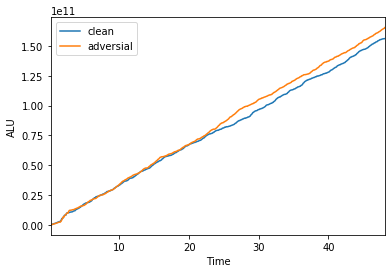

In [7]:
# ALU instructions:
import operator
sum_list=list(map(sum, zip(data_dict[0]["branches"],data_dict[0]["L1_dcache_loads"],data_dict[0]["L1_dcache_stores"])))
clean_ALU=list(map(operator.sub, data_dict[0]["instructions"],sum_list))
sum_list=list(map(sum, zip(data_dict[1]["branches"],data_dict[1]["L1_dcache_loads"],data_dict[1]["L1_dcache_stores"])))
adversarial_ALU=list(map(operator.sub, data_dict[1]["instructions"],sum_list))
df = pd.DataFrame({"clean": clean_ALU,"adversial": adversarial_ALU,}, index=data_dict[0]["time"])
lines = df.plot.line()
lines.set_xlabel("Time")
lines.set_ylabel("ALU")
lines.ticklabel_format(useOffset=False)
clean_avg=statistics.mean(clean_ALU)
adversarial_avg=statistics.mean(adversarial_ALU)
print("clean model avg :"+str(clean_avg))
print("adversarial model avg :"+str(adversarial_avg))
print("percentage change  :"+str(((adversarial_avg-clean_avg)/clean_avg)*100))

In [8]:
len(clean_ALU)

488